# PIL
## Загрузка и вывод изображения

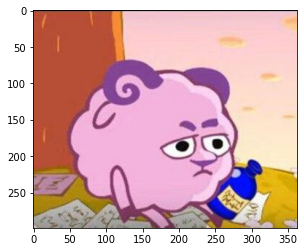

In [2]:

from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

pil_im = Image.open('barash.jpg')
imshow(np.asarray(pil_im))

## Преобразование изображения к полутоновому

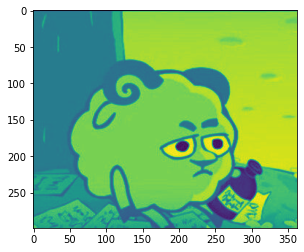

In [45]:
pil_im = Image.open('barash.jpg').convert('L')
pil_im.save("bw_barash.jpg")
imshow(np.asarray(pil_im))

## Преобразование в JPEG и сохранение изображений

In [33]:
filelist = ['/home/comazzo/VSCodeProjects/barash.png',
            '/home/comazzo/VSCodeProjects/bw_barash.png']
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("Cannot transform")

Cannot transform
Cannot transform


## Функция возвращающая список имен всех .jpg файлов в каталоге

In [34]:
def get_imlist(path):
    return[os.path.join(path,f) for f in os.listdir(path) 
                                if f.endswith('.jpg')]

## Создание миниатюры

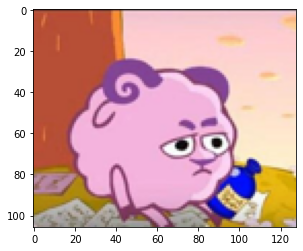

In [62]:
pil_im_mini = pil_im
pil_im_mini.thumbnail((128, 128))
imshow(np.asarray(pil_im_mini))

## Кадрирование (обрезка)

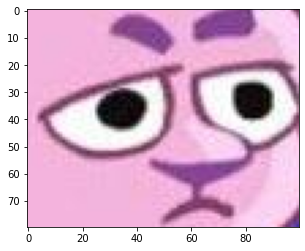

In [87]:
box = (170,150,270,230)
region = pil_im.crop(box)
imshow(np.asarray(region))

## Вставка областей

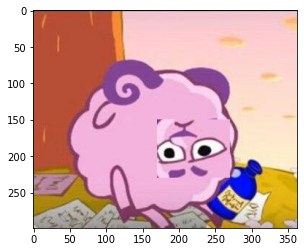

In [88]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)
imshow(np.asarray(pil_im))

## Изменение размера

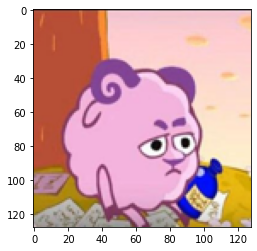

In [91]:
out = pil_im.resize((128,128))
imshow(np.asarray(out))

## Поворот изображения

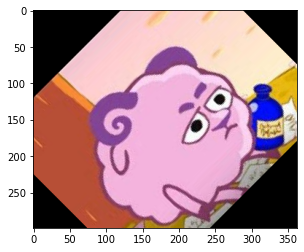

In [93]:
out = pil_im.rotate(45)
imshow(np.asarray(out))

# Библиотека Matplotlib
## Рисование точек и прямых линий

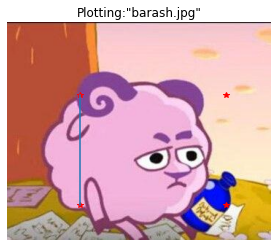

In [4]:
from pylab import *

# чтение изображения в массив
im = array(Image.open('barash.jpg'))

# поместить на график изображение
imshow(im)

# несколько точек
x = [100,100,300,300]
y = [100,250,100,250]

# нанести точки в виде красных звездочек
# вместо r* можно использовать другие цвета (меняем r)
# и другие объекты-маркеры или виды линий (меняем *)
plot(x, y, 'r*')

# нарисовать отрезок, соединяющий первые две точки
plot(x[:2],y[:2])

# отключение отображения осей
axis('off')

# добавить заголовок и показать график
title('Plotting:"barash.jpg"')
show()

## Изолинии - линии уровня

(0.5, 361.5, 0.5, 298.5)

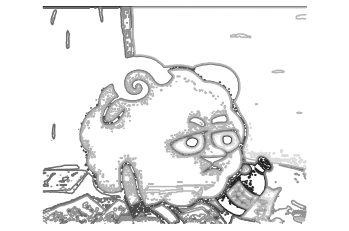

In [104]:
# прочитать изображение в массив (с преобразованием в полутоновое)
im = array(Image.open('barash.jpg').convert('L'))

# создать новый рисунок
figure()

# не использовать цвета
gray()

# не показывать изолинии относительно левого верхнего угла
contour(im, origin='image')
axis('equal')
axis('off')

## Гистограммы изображений

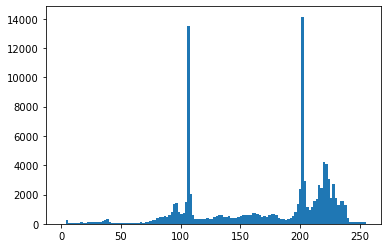

In [108]:
figure()
# график распределения значений пикселей (по яркости)
# второй аргумент - число интервалов разбиения
# flatten - преобразование в одномерный массив, располагая значения по строкам
hist(im.flatten(),128)
show()

## Интерактивкное аннотирование (в jn не работает)

In [ ]:
im = array(PIL.Image.open('barash.jpg'))
imshow(im)
print('Щелкните в 3 точках')
x = ginput(3)
print('Вы щелкнули:', x)
show()

Щелкните в 3 точках

Вы щелкнули: [(108.50054112554109, 121.97997835497836), (224.18506493506493, 177.79978354978354), (95.55681818181814, 203.68722943722943)]

# NumPy
## Представление изображения в виде массива

In [5]:
# выведем число строк, столбцов, цветовых каналов и тип данных
im = array(Image.open('barash.jpg'))
print(im.shape, im.dtype)

# f - используем float
# так как полутон - третьего элемента кортежа нет
im = array(Image.open('barash.jpg').convert('L'), 'f')
print(im.shape, im.dtype)

# можно обращаться по индексам и делать срезы

(299, 362, 3) uint8
(299, 362) float32


## Преобразование уровня яркости


In [6]:
im = array(Image.open('barash.jpg').convert('L'))
im2 = 255 - im # инвертировать изображение по яркости

im3 = (100.0 / 255 ) * im + 100 # привести к интервалу [100, 200]
im4 = 255.0 * (im / 255.0) ** 2 # применить квадратичную функцию

0 255
0 255
100 200
0 255


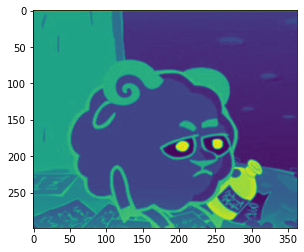

In [21]:
print(int(im.min()), int(im.max())) # выводим минимум и максимум для массивов
print(int(im2.min()), int(im2.max()))
print(int(im3.min()), int(im3.max()))
print(int(im4.min()), int(im4.max()))

imshow(im2)


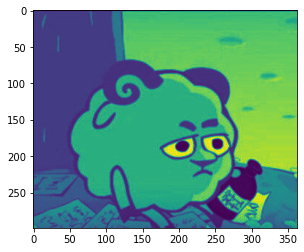

In [24]:
pil_im = Image.fromarray(uint8(im4)) # желательно делать это преобразование
imshow(pil_im)

## Изменение размера изображения

In [25]:
def imresize(im, sz):
    """ Изменить размер массива с помощью PIL. """
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

## Выравнивание гистограммы

In [7]:
def histeq(im, nbr_bins=256):
    """ Выравнивание гистограммы полутонового изображения """

    # получить гистограмму изображения
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum() # функция распределения
    cdf = 255 * cdf / cdf[-1] # нормировать

    # использовать линейную интерполяцию cdf для нахождения
    # значений новых пикселей
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

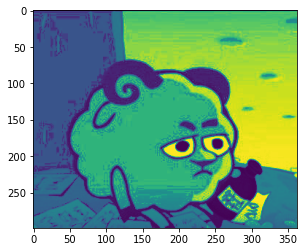

In [8]:
im = array(Image.open('barash.jpg').convert('L'))
im2, cdf = histeq(im)
imshow(im2)

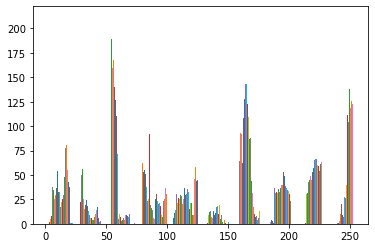

In [10]:
figure()
hist(im2) # гистограмма после выравнивания
show()

## Усреднение изображений

In [13]:
def compute_average(imlist):
    """ Вычислить среднее списка изображений
        Уменьшает шум по списку изображений """
    # открыть первое изображение и преобразовать в массив типа float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...пропущено')
            averageim /= len(imlist)
    # вернуть среднее в виде массива значений типа uint8
    return array(averageim, 'uint8')

## Метод главных компонент для изображений
 

In [14]:
# техника понижения размерности изображений
# обычно используют сингулярное разложение (SVD) для небольшой размерности
# для большой:
def pca(X):
    """ Метод главных компонент
        вход:  матрица X, в которой обучающие данные хранятся в виде
               линеаризованных массивов, по одному в каждой строке
        выход: матрица проекции (наиболее важные измерения в начале), 
               дисперсия и среднее"""

    # получить количество измерений 
    num_gata, dim = X.shape
    
    # центрировать данные
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim > num_data:
        # PCA с компактным трюком
        M = dot(X, X.T) #  ковариационная матрица
        e, EV = linalg.eigh(M) # собственные значения и собственные векторы
        tmp = dot(X.t, EV).T # компактный трюк
        V = tmp[::-1] # меняем порядок потому что нам нужны
                      # последние собственные векторы
        S = sqrt(e)[::-1] # меняем порядок, потому что собственные 
                          # значения перечислены в порядке возрастания
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        # PCA с ипсользованием сингулярного разложения
        U, S, V = linalg.svd(X)
        V = V[:num_data] # имеет смысл возвращать только первые
                         # num_data строк
    # вернуть матрицу проекции, дисперсию и среднее
    return V, S, mean_X

In [ ]:
# ссылка на датасет неактивна
# imlist = 
im = array(Image.open(imlist[0])) # открыть одно изображения
                                  # для получения размера 
m, n =im.shape[0:2] # получить размер изображений
imnbr = len(imlist) # получить число изображений

# создать матрицу для хранения всех линеаризованных изображений
immtarix = array([array(Image.open(im)).flatten()
for im in imlist], 'f')

# выполнить матод главных компонент
V, S, immean = pca(immatrix)

# показать несколько изображений (среднее и первые 7 мод)
figure()
gray()
subplot(2,4,1)
imshow(immean.reshape(m, n))
for i in range(7):
    subplot(2, 4, i+2)
    imshow(V[i].reshape(m, n))
show()

## Использование модуля pickle

In [ ]:
# для сереализации
# сохранить среднее изображение и главные компоненты
f = open('font_pca_modes.pkl', 'wb')
pickle.dump(immean, f)
pickle.dump(V, f)
f.close()

In [ ]:
# загрузить среднее изображение  и главные компоненты
f = open('font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()
# порядок объектов должен быть таким же как при сохранении
# есть модуль на C - cpickle

In [ ]:
# открыть файл и сохранить данные
with open('font_pca_modes.pkl', 'wb') as f:
    pickle.dump(immean, f)
    pickle.dump(V, f)

In [ ]:
# открыть файл и загрузить данные
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

In [ ]:
# для сохранения массива х в файле
savetxt('test.txt', x ,'%i')

In [ ]:
# загрузка
x = loadtxt('test.txt')

# SciPy
## Размытие изображений
Классическая свертка изображения - гауссово размытие

I(сигма) = I * G(сигма)

I - изображение, G(сигма) - двумерное гауссово ядро с отклонение сигма

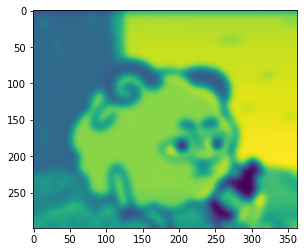

In [9]:
from scipy.ndimage import filters

im = array(Image.open('barash.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5) # 5 - отклонение
# чем больше сигма, тем сильнее размытие
imshow(im2)

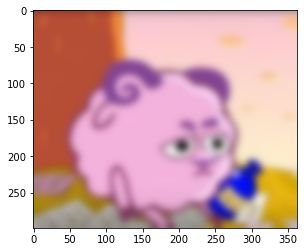

In [17]:
# для цветного изображения - размытие по каждому цветовому каналу
im = array(Image.open('barash.jpg'))
im2 = zeros(im.shape)
for i in range(3):
    im2[:, :, i] = filters.gaussian_filter(im[:, :, i], 5)
im2 = uint8(im2) # эквивалентно im2 = array(im2, 'uint8')
imshow(im2)

## Производные изображения
Градиент изображения - вектор

I = [Ix, Iy]^T

Модуль градиента равен корню из суммы квадратов Ix и Iy. Он описывает насколько сильно изменяется яркость.

Для вычисления производных изображения можно воспользоваться дискретными аппроксимациями. Проще всего реализовать их в виде сверток:

Ix = I * Dx и Iy = I * Dy

Dx, Dy - операторы Прюитта или операторы Собеля

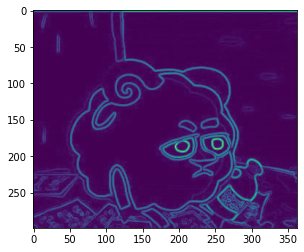

In [19]:
im = array(Image.open('barash.jpg').convert('L'))

# операторы Собеля
imx = zeros(im.shape)
filters.sobel(im, 1, imx) # второй аргумент - производная по x или по y
                          # третий - куда сохранить результат

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx ** 2 + imy ** 2)
imshow(magnitude)

Недостаток этого метода - производные берутся в масштабе, определяемом разрешением изображения

Чтобы уменьшить зависимость от шума воспользуемся фильтром Гаусса

array([[0.36639614, 0.36690235, 0.36798811, ..., 0.75905333, 0.75786967,
        0.75728006],
       [1.05640381, 1.05792336, 1.06118005, ..., 2.18154725, 2.17804072,
        2.17629516],
       [1.6262666 , 1.62879948, 1.63421993, ..., 3.33569657, 3.33001084,
        3.32718423],
       ...,
       [0.51317926, 0.48584883, 0.43427372, ..., 0.35011881, 0.41251989,
        0.44436977],
       [0.32952603, 0.31216868, 0.27940182, ..., 0.17768994, 0.21804238,
        0.23865634],
       [0.11380579, 0.10784824, 0.09659929, ..., 0.05335337, 0.06731308,
        0.07444738]])

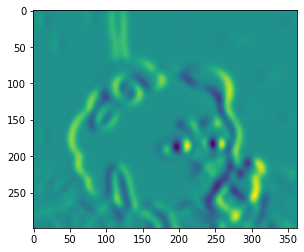

In [21]:
sigma = 5

imx = zeros(im.shape)
imshow(filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx))
# третий аргумент - порядок производных в каждом направлении

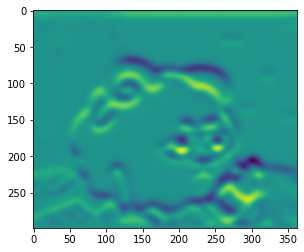

In [22]:
imy = zeros(im.shape)
imshow(filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy))

## Морфология - подсчет объектов

Морфология - инфраструктура для определения базовых форм. Используется для бинарных и полутоновых изображений.

Модуль morphology в scipy.ndimage

Количество объектов: 122


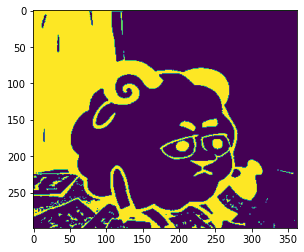

In [10]:
from scipy.ndimage import measurements, morphology

# загрузить изображение и выполнить бинаризацию
im = array(Image.open('barash.jpg').convert('L'))
im = 1 * (im < 128) # преобразуем булев массив в бинарный

labels, nbr_objects = measurements.label(im)
print("Количество объектов:", nbr_objects)
imshow(im)

Количество объектов: 14


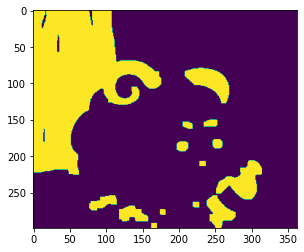

In [37]:
# морфология - операция открытия разделяет объекты
im_open = morphology.binary_opening(im, ones((4, 4)), iterations=2)
# ones() - определяет размер объектов по ox oy
# iterations - количество выполнений операции

labels_open, nbr_objects_open = measurements.label(im_open)
print("Количество объектов:", nbr_objects_open)
imshow(im_open)

## Полезные модули в SciPy
Чтение и запись mat-файлов

In [ ]:
data = scipy.io.loadmat('test.mat')

In [ ]:
data = {}
data['x'] = x
scipy.io.savemat('test.mat', data)

Сохранение массивов как изображений

In [ ]:
from scipy.misc import imsave
scipy.misc.imsave('test.jpg', im)

In [ ]:
lena = scipy.misc.lena() # тестовое изображение

# Более сложная очистка изображения от шумов
Модель Рудина-Ошера-Фатеми(ROF)
Полная вариация(TV) полутонового изображения I - сумма норм градиентов

Суммирование проводится по всем точкам изображения

В варианте модели ROF Шамболя, цель - нахождение очищенного от шумов изображения U для которого достигается минимум функции

min||I-U||^2 + 2*lambda*J(U)

||I-U|| - норма, измеряющая различие исходного и выходного изображений

In [53]:
def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    """Реализация модели очистки от шумов Рудина-Ошера-Фатеми
       (ROF) с использованием численного алгоритма, приведенного
       в формуле (11) А. Шамболя(2005)
       Вход:  зашумленное изображение (полутоновое, начальная
              гипотеза о U, вес члена, регуляризирующего TV,
              величина шага, допуск в условии остановки.
       Выход: очищенное от шума и текстуры изображение, 
              остаточная текстура. """
    m, n = im.shape
    # инициализация
    U = U_init
    Px = im # компонента x двойственной задачи
    Py = im # компонента y двойственной задачи
    error = 1

    while(error > tolerance):
        Uold = U
        # градиент переменной прямой задачи
        # roll - циклический сдвиг вдоль указанной оси
        GradUx = roll(U, -1, axis=1) - U # компонента x градиента U
        GradUy = roll(U, -1, axis=0) - U # компонента y градиента U

        # изменить переменную двойственной задачи
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1, sqrt(PxNew ** 2 + PyNew ** 2))
        Px = PxNew / NormNew # изменить компоненту x (двойственной задачи)
        Py = PyNew / NormNew # изменить компоненту y (двойственной задачи)

        # изменить переменную прямой задачи 
        RxPx = roll(Px, 1, axis=1) # циклический сдвиг компоненты x
                                   # вдоль оси x
        RyPy = roll(Py, 1, axis=0) # циклический сдвиг компоненты y
                                   # вдоль оси y
        DivP = (Px - RxPx) + (Py - RyPy) # дивергенция двойственного поля
        U = im + tv_weight * DivP # изменение переменной прямой задачи

        # пересчитать погрещность                           
        error = linalg.norm(U - Uold)/sqrt(n * m)
    return U, im - U # очищенное от шумов изображение и остаточная текстура

## Синтезированный пример

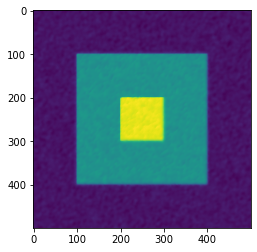

In [55]:
import numpy as np

# синтезировать изображение с шумом
im = zeros((500,500))
im[100:400, 100:400] = 128
im[200:300, 200:300]= 255
im = im + 30 * np.random.standard_normal((500, 500))

U, T = denoise(im, im)
G = filters.gaussian_filter(im, 10)

imshow(U)
# сохранить результат
# from scipy.misc import imsave
# imsave('synth_rof.pdf', U)
# imsave('synth_gaussian.pdf', G)


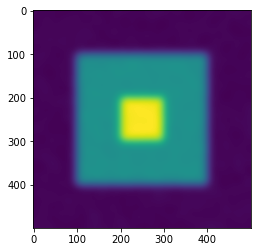

In [56]:
imshow(G)

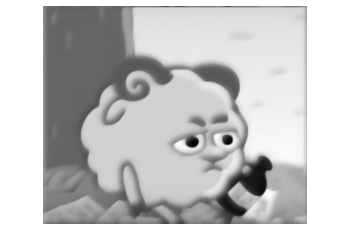

In [58]:
im = array(Image.open('barash.jpg').convert('L'))
U, T = denoise(im, im)

figure()
gray()
imshow(U)
axis('equal')
axis('off')
show()

# Упражнения
## 1. Из-за увеличения размытия(сигмы) изображения уменьшается разность яркости рядом стоящих пикселей
## Поэтому изолинии все хуже отображают границы объектов 

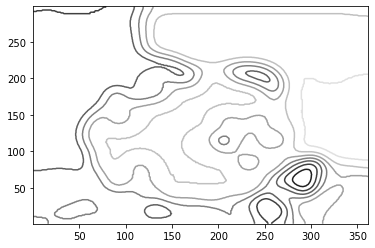

In [80]:
im = array(Image.open('barash.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 10)
# чем больше сигма, тем сильнее размытие
contour(im2, origin='image')
# imshow(im2)

## 2. Нерезкое маскирование

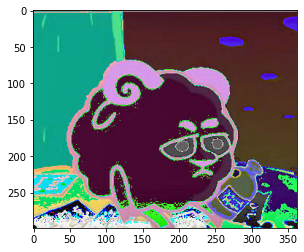

In [181]:
im = array(Image.open('barash.jpg'))
im2 = filters.gaussian_filter(im, 300)
imshow(im-im2)

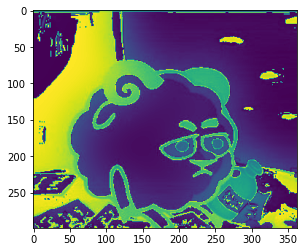

In [7]:
im = array(Image.open('barash.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 30)
imshow(im-im2)

## 3. Изображение-частное

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


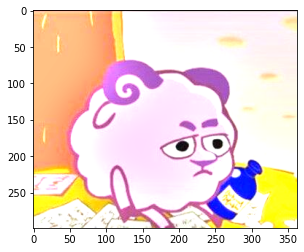

In [103]:
im = array(Image.open('barash.jpg'))
im2 = filters.gaussian_filter(im, 30)
im = im/im2
imshow(im)

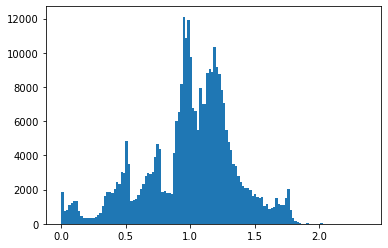

In [107]:
figure()
hist(im.flatten(), 128)
show()

## 4.

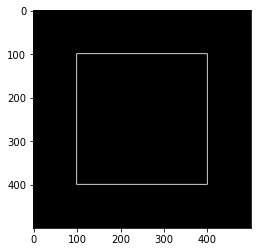

In [154]:
im = zeros((500,500))
im[100:400, 100:400] = 128
imshow(im)
imx = zeros(im.shape)
filters.sobel(im, 1, imx)


imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx ** 2 + imy ** 2)

imshow(magnitude)

## 5.

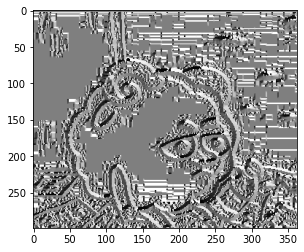

In [182]:
im = array(Image.open('barash.jpg').convert('L'))
imx = zeros(im.shape)
filters.sobel(im, 1, imx) # второй аргумент - производная по x или по y
                          # третий - куда сохранить результат

imy = zeros(im.shape)
filters.sobel(im, 0, imy)


# imres = imy-imx
magnitude = sqrt(imx ** 2 + imy ** 2)
imshow(arctan2(imx,imy))
# imshow(imres)

## 6.

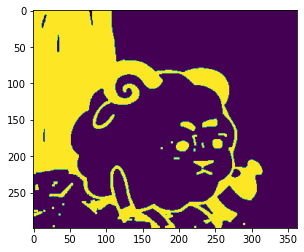

In [14]:
im_open = morphology.binary_opening(im, ones((2, 2)), iterations=2)
imshow(im_open)


Количество объектов: 25 [1 1 1 ... 0 0 0]


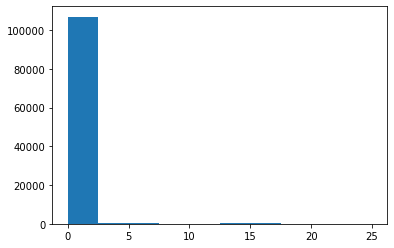

In [15]:
labels_open, nbr_objects_open = measurements.label(im_open)
print("Количество объектов:", nbr_objects_open, labels_open.flatten())
# imshow(im_open)
figure()
hist(labels_open.flatten())
show()